In [1]:
import pandas as pd

# Memuat dataset
data = pd.read_csv('diabetes.csv')

# Menampilkan informasi dasar tentang dataset
print(data.info())
print(data.describe())

# Menampilkan beberapa baris pertama dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Mengidentifikasi kolom kategorikal dan numerik
kolom_kategorikal = []  # Sesuaikan dengan nama kolom kategorikal yang ada di dataset Anda
kolom_numerik = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Pipeline prapemrosesan untuk data numerik
transformer_numerik = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline prapemrosesan untuk data kategorikal (jika ada)
if kolom_kategorikal:
    transformer_kategorikal = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Menggabungkan pipeline prapemrosesan
    prapemrosesan = ColumnTransformer(
        transformers=[
            ('num', transformer_numerik, kolom_numerik),
            ('cat', transformer_kategorikal, kolom_kategorikal)
        ])
else:
    prapemrosesan = ColumnTransformer(
        transformers=[
            ('num', transformer_numerik, kolom_numerik)
        ])

# Menerapkan prapemrosesan
data_prapemrosesan = prapemrosesan.fit_transform(data)

# Memeriksa hasil prapemrosesan
print(data_prapemrosesan.shape)


(768, 9)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Misalkan target adalah kolom 'Outcome'
X = data_prapemrosesan
y = data['Outcome']

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Regresi Logistik
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

# Melatih model Pohon Keputusan
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
pred_dt = model_dt.predict(X_test)

# Melatih model Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
pred_nb = model_nb.predict(X_test)

# Evaluasi kinerja model
def evaluasi_model(y_test, prediksi):
    akurasi = accuracy_score(y_test, prediksi)
    presisi = precision_score(y_test, prediksi, average='weighted')
    recall = recall_score(y_test, prediksi, average='weighted')
    f1 = f1_score(y_test, prediksi, average='weighted')
    return akurasi, presisi, recall, f1

# Evaluasi model Regresi Logistik
evaluasi_lr = evaluasi_model(y_test, pred_lr)
print(f"Evaluasi Regresi Logistik: Akurasi={evaluasi_lr[0]}, Presisi={evaluasi_lr[1]}, Recall={evaluasi_lr[2]}, F1-Score={evaluasi_lr[3]}")

# Evaluasi model Pohon Keputusan
evaluasi_dt = evaluasi_model(y_test, pred_dt)
print(f"Evaluasi Pohon Keputusan: Akurasi={evaluasi_dt[0]}, Presisi={evaluasi_dt[1]}, Recall={evaluasi_dt[2]}, F1-Score={evaluasi_dt[3]}")

# Evaluasi model Naive Bayes
evaluasi_nb = evaluasi_model(y_test, pred_nb)
print(f"Evaluasi Naive Bayes: Akurasi={evaluasi_nb[0]}, Presisi={evaluasi_nb[1]}, Recall={evaluasi_nb[2]}, F1-Score={evaluasi_nb[3]}")

# Memilih model terbaik berdasarkan F1-score
model_evaluations = {
    'Logistic Regression': evaluasi_lr,
    'Decision Tree': evaluasi_dt,
    'Naive Bayes': evaluasi_nb
}

best_model_name = max(model_evaluations, key=lambda k: model_evaluations[k][3])
best_model = {'Logistic Regression': model_lr, 'Decision Tree': model_dt, 'Naive Bayes': model_nb}[best_model_name]
best_model_evaluation = model_evaluations[best_model_name]

print(f"Model terbaik adalah {best_model_name} dengan evaluasi: Akurasi={best_model_evaluation[0]}, Presisi={best_model_evaluation[1]}, Recall={best_model_evaluation[2]}, F1-Score={best_model_evaluation[3]}")

# Menyimpan model terbaik ke dalam file menggunakan pickle dengan ekstensi .sav
with open('model_terbaik.sav', 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model terbaik ({best_model_name}) telah disimpan sebagai 'model_terbaik.sav'")


Evaluasi Regresi Logistik: Akurasi=1.0, Presisi=1.0, Recall=1.0, F1-Score=1.0
Evaluasi Pohon Keputusan: Akurasi=1.0, Presisi=1.0, Recall=1.0, F1-Score=1.0
Evaluasi Naive Bayes: Akurasi=1.0, Presisi=1.0, Recall=1.0, F1-Score=1.0
Model terbaik adalah Logistic Regression dengan evaluasi: Akurasi=1.0, Presisi=1.0, Recall=1.0, F1-Score=1.0
Model terbaik (Logistic Regression) telah disimpan sebagai 'model_terbaik.sav'


In [8]:
# Memuat model terbaik dari file
with open('model_terbaik.sav', 'rb') as file:
    model_loaded = pickle.load(file)

# Menggunakan model yang dimuat untuk membuat prediksi
pred_loaded = model_loaded.predict(X_test)

# Menghitung akurasi dari model yang dimuat
akurasi_loaded = accuracy_score(y_test, pred_loaded)
print(f"Akurasi model yang dimuat: {akurasi_loaded}")


Akurasi model yang dimuat: 1.0


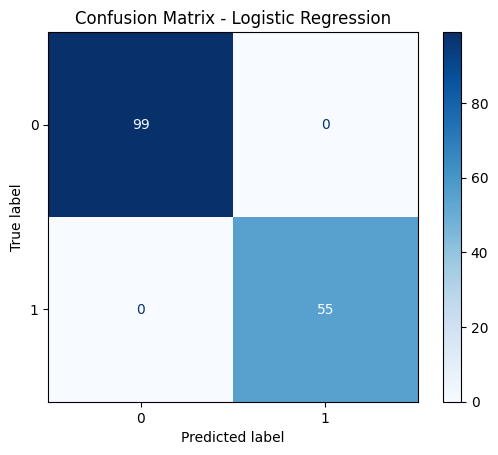

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Membuat Confusion Matrix
cm_best = confusion_matrix(y_test, pred_loaded)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)

# Menampilkan Confusion Matrix
disp_best.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()


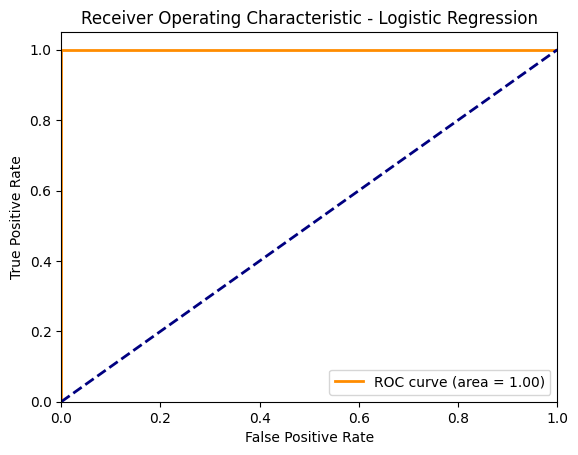

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

# Membuat probabilitas prediksi
y_prob_best = model_loaded.predict_proba(X_test)[:, 1]

# Mengonversi label 'Outcome' menjadi 1 dan 0 jika perlu
y_test_encoded = y_test  # Asumsikan label sudah dalam bentuk 0 dan 1

# Membuat ROC Curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_prob_best)
roc_auc = roc_auc_score(y_test_encoded, y_prob_best)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic - {best_model_name}')
plt.legend(loc='lower right')
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Mengidentifikasi kolom numerik
kolom_numerik = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
kolom_numerik.remove('Outcome')  # Menghapus kolom target dari daftar kolom numerik

# Pipeline prapemrosesan untuk data numerik
transformer_numerik = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Menggabungkan pipeline prapemrosesan
prapemrosesan = ColumnTransformer(
    transformers=[
        ('num', transformer_numerik, kolom_numerik)
    ])

# Menerapkan prapemrosesan
data_prapemrosesan = prapemrosesan.fit_transform(data)

# Memeriksa hasil prapemrosesan
print(data_prapemrosesan.shape)


(768, 8)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Misalkan target adalah kolom 'Outcome'
X = data_prapemrosesan
y = data['Outcome']

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Regresi Logistik
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

# Melatih model Pohon Keputusan
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
pred_dt = model_dt.predict(X_test)

# Melatih model Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
pred_nb = model_nb.predict(X_test)

# Evaluasi kinerja model
def evaluasi_model(y_test, prediksi):
    akurasi = accuracy_score(y_test, prediksi)
    presisi = precision_score(y_test, prediksi, average='weighted')
    recall = recall_score(y_test, prediksi, average='weighted')
    f1 = f1_score(y_test, prediksi, average='weighted')
    return akurasi, presisi, recall, f1

# Evaluasi model Regresi Logistik
evaluasi_lr = evaluasi_model(y_test, pred_lr)
print(f"Evaluasi Regresi Logistik: Akurasi={evaluasi_lr[0]}, Presisi={evaluasi_lr[1]}, Recall={evaluasi_lr[2]}, F1-Score={evaluasi_lr[3]}")

# Evaluasi model Pohon Keputusan
evaluasi_dt = evaluasi_model(y_test, pred_dt)
print(f"Evaluasi Pohon Keputusan: Akurasi={evaluasi_dt[0]}, Presisi={evaluasi_dt[1]}, Recall={evaluasi_dt[2]}, F1-Score={evaluasi_dt[3]}")

# Evaluasi model Naive Bayes
evaluasi_nb = evaluasi_model(y_test, pred_nb)
print(f"Evaluasi Naive Bayes: Akurasi={evaluasi_nb[0]}, Presisi={evaluasi_nb[1]}, Recall={evaluasi_nb[2]}, F1-Score={evaluasi_nb[3]}")

# Memilih model terbaik berdasarkan F1-score
model_evaluations = {
    'Logistic Regression': evaluasi_lr,
    'Decision Tree': evaluasi_dt,
    'Naive Bayes': evaluasi_nb
}

best_model_name = max(model_evaluations, key=lambda k: model_evaluations[k][3])
best_model = {'Logistic Regression': model_lr, 'Decision Tree': model_dt, 'Naive Bayes': model_nb}[best_model_name]
best_model_evaluation = model_evaluations[best_model_name]

print(f"Model terbaik adalah {best_model_name} dengan evaluasi: Akurasi={best_model_evaluation[0]}, Presisi={best_model_evaluation[1]}, Recall={best_model_evaluation[2]}, F1-Score={best_model_evaluation[3]}")

# Menyimpan model terbaik ke dalam file menggunakan pickle dengan ekstensi .sav
with open('model_terbaik.sav', 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model terbaik ({best_model_name}) telah disimpan sebagai 'model_terbaik.sav'")


Evaluasi Regresi Logistik: Akurasi=0.7532467532467533, Presisi=0.7553936387360154, Recall=0.7532467532467533, F1-Score=0.7541909620991253
Evaluasi Pohon Keputusan: Akurasi=0.7532467532467533, Presisi=0.763649049363335, Recall=0.7532467532467533, F1-Score=0.7564164648910411
Evaluasi Naive Bayes: Akurasi=0.7662337662337663, Presisi=0.7706639480056073, Recall=0.7662337662337663, F1-Score=0.7679249670568173
Model terbaik adalah Naive Bayes dengan evaluasi: Akurasi=0.7662337662337663, Presisi=0.7706639480056073, Recall=0.7662337662337663, F1-Score=0.7679249670568173
Model terbaik (Naive Bayes) telah disimpan sebagai 'model_terbaik.sav'
